# 根据大连理工的词库对投诉的数据进行情绪词提取

## 大连理工大学中文情感词汇本体库介绍
中文情感词汇本体库是大连理工大学信息检索研究室在林鸿飞教授的指导下经过全体 教研室成员的努力整理和标注的一个中文本体资源。该资源从不同角度描述一个中文词汇或 者短语，包括词语词性种类、情感类别、情感强度及极性等信息。

中文情感词汇本体的情感分类体系是在国外比较有影响的 Ekman 的 6 大类情感分类体 系的基础上构建的。在 Ekman 的基础上，词汇本体加入情感类别“好”对褒义情感进行了 更细致的划分。最终词汇本体中的情感共分为 7 大类 21 小类。

构造该资源的宗旨是在情感计算领域，为中文文本情感分析和倾向性分析提供一个便捷 可靠的辅助手段。中文情感词汇本体可以用于解决多类别情感分类的问题，同时也可以用于 解决一般的倾向性分析的问题。

### 本体格式介绍

情感分类按照论文《情感词汇本体的构造》所述，情感分为 7 大类 21 小类。 情感强度分为 1,3,5,7,9 五档，9 表示强度最大，1 为强度最小。

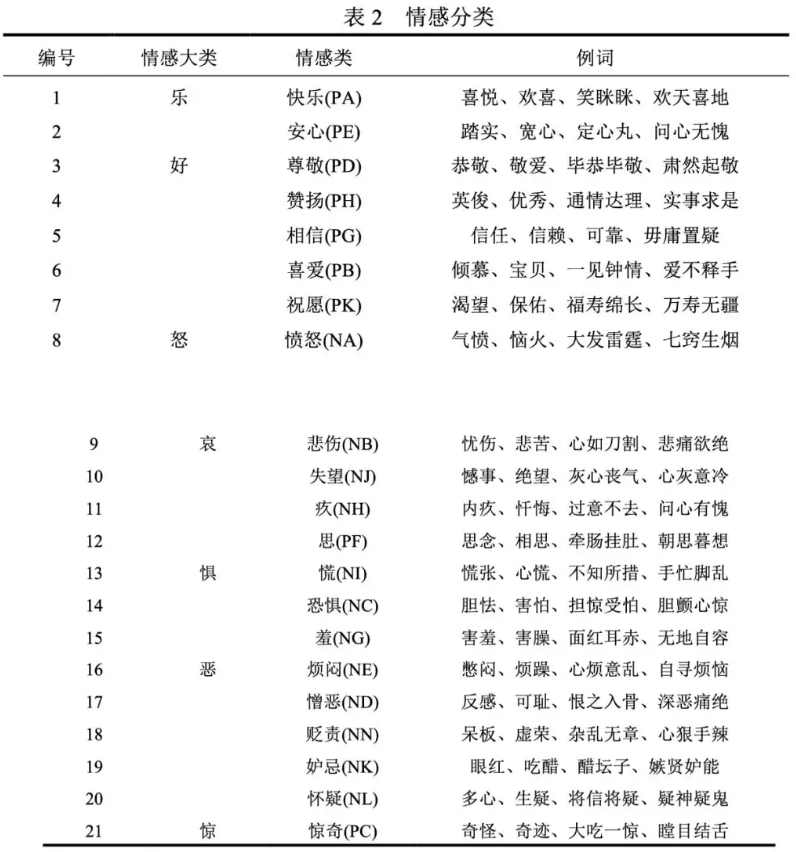

### 词性种类
情感词汇本体中的词性种类一共分为 7 类，分别是
- 名词（noun）
- 动词（verb）
- 形容词 （adj）
- 副词（adv）
- 网络词语（nw）
- 成语（idiom）
- 介词短语（prep）


### 极性标注
每个词在每一类情感下都对应了一个极性。其中，0 代表中性，1 代表褒义，2 代表贬 义，3 代表兼有褒贬两性。

注：褒贬标注时，通过词本身和情感共同确定，所以有些情感在一些词中可能极性 1， 而其他的词中有可能极性为 0。

## 读取数据

### 读取投诉数据

In [2]:
import pandas as pd

cpl_df = pd.read_excel('C:/Users/60448/Desktop/complain.xlsx')
cpl_df.head()

,CPL_NO,缺陷描述
0,QC2015010001,正常行驶途中突然esp报警，失去动力，任何操作都不好使，重新点火后好使。
1,QC2015010002,该车行驶5万公里，因2、3档抖动，在2013年5月索赔更换离合器。现在车辆行驶到9万公里，有...
2,QC2015010006,机油冷却器和机油滤座密封实效，出现机油外漏的故障；特别是在发动机高速运转的状态下，此处漏机油...
3,QC2015010007,在一汽大众北京骏宝威4s点检测后悬架发现：\n1）左侧悬挂变形1mm，变形最大处发现...
4,QC2015010009,换档操纵杆保险按钮行驶途中脱落，后发现按钮两根塑料臂断裂，导致脱落，按钮脱落后难以换档。


### 读取词库数据

In [6]:
import pandas as pd

df = pd.read_excel('C:/Users/60448/Desktop/大连理工大学中文情感词汇本体.xlsx')
df.head(10)

,词语,词性种类,词义数,词义序号,情感分类,强度,极性,辅助情感分类,强度.1,极性.1,Unnamed: 10,Unnamed: 11
0,脏乱,adj,1.0,1.0,NN,7,2,NaN,NaN,NaN,NaN,NaN
1,糟报,adj,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
2,早衰,adj,1.0,1.0,NE,5,2,NaN,NaN,NaN,NaN,NaN
3,责备,verb,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
4,贼眼,noun,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
5,战祸,noun,1.0,1.0,ND,5,2,NC,5.0,2.0,NaN,NaN
6,招灾,adj,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
7,折辱,noun,1.0,1.0,NE,5,2,NN,5.0,2.0,NaN,NaN
8,中山狼,noun,1.0,1.0,NN,5,2,NaN,NaN,NaN,NaN,NaN
9,清峻,adj,1.0,1.0,PH,5,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[['词语', '词性种类', '词义数', '词义序号', '情感分类', '强度', '极性']]
df.head()

,词语,词性种类,词义数,词义序号,情感分类,强度,极性
0,脏乱,adj,1.0,1.0,NN,7,2
1,糟报,adj,1.0,1.0,NN,5,2
2,早衰,adj,1.0,1.0,NE,5,2
3,责备,verb,1.0,1.0,NN,5,2
4,贼眼,noun,1.0,1.0,NN,5,2


## 情绪词语列表整理完成

按照七大情绪划分

In [8]:
Happy = []
Good = []
Surprise = []
Anger = []
Sad = []
Fear = []
Disgust = []


for idx, row in df.iterrows():
    if row['情感分类'] in ['PA', 'PE']:
        Happy.append(row['词语'])
    if row['情感分类'] in ['PD', 'PH', 'PG', 'PB', 'PK']:
        Good.append(row['词语']) 
    if row['情感分类'] in ['PC']:
        Surprise.append(row['词语'])     
    if row['情感分类'] in ['NA']:
        Anger.append(row['词语'])    
    if row['情感分类'] in ['NB', 'NJ', 'NH', 'PF']:
        Sad.append(row['词语'])
    if row['情感分类'] in ['NI', 'NC', 'NG']:
        Fear.append(row['词语'])
    if row['情感分类'] in ['NE', 'ND', 'NN', 'NK', 'NL']:
        Disgust.append(row['词语'])
        
Positive = Happy + Good +Surprise
Negative = Anger + Sad + Fear + Disgust

print('情绪词语列表整理完成')   

情绪词语列表整理完成


In [19]:
Positive

['瑞雪',
 '神采',
 '喜人',
 '怡悦',
 '进益',
 '奏凯',
 '鸾凤和鸣',
 '安好',
 '特等',
 '欢快',
 '如意',
 '得志',
 '欢娱',
 '庆幸',
 '喜气',
 '兴高采烈',
 '快意',
 '艳福',
 '乐陶陶',
 '逗人',
 '眉开眼笑',
 '笑逐言开',
 '距跃三百',
 '鹊笑鸠舞',
 '神采飞扬',
 '忍俊不禁',
 '嫣然',
 '笑噱',
 '和颜悦色',
 '胡敲梆子乱击磬－欢喜若狂',
 '新媳妇怀孕－暗喜',
 '侥幸',
 '安乐窝',
 '怡和',
 '娴静',
 '安逸',
 '安居乐业',
 '安适',
 '妙趣横生',
 '旱苗得雨',
 '地利人和',
 '一路顺风',
 '三对六面',
 '海阔天空',
 '洞房花烛',
 '哑然失笑',
 '黄道吉日',
 '相门有相',
 '顿开茅塞',
 '鸿飞冥冥',
 '因祸得福',
 '联翩而至',
 '白日升天',
 '破壁飞去',
 '时通运泰',
 '放歌纵酒',
 '藏器待时',
 'xixi',
 'CC',
 '超爽',
 '平定',
 '骋目',
 '桂冠',
 '酣眠',
 '得救',
 '夺魁',
 '高升',
 '贺喜',
 '欢歌',
 '欢宴',
 '回归',
 '吉期',
 '融融',
 '自在',
 '自得其乐',
 '告捷',
 '服帖',
 '安然',
 '敞亮',
 '水到渠成',
 '出头',
 '迎刃而解',
 '亮堂',
 '甜美',
 '洋洋',
 '庆贺',
 '腾欢',
 '同乐',
 '优礼',
 '进展',
 '晋职',
 '尽欢',
 '称心如愿',
 '安然无事',
 '喜盈盈',
 '如鱼得水',
 '令人高兴',
 '欣慰',
 '快慰',
 '喜悦',
 '欢蹦乱跳',
 '皆大欢喜',
 '雀跃',
 '喜气洋洋',
 '恭喜',
 '令人满意',
 '怡然自得',
 '满载而归',
 '起劲',
 '势如破竹',
 '兴冲冲',
 '轻快',
 '可喜',
 '捧檄色喜',
 '鼓腹讴歌',
 '乐而忘返',
 '赏心乐事',
 '洋洋得意',
 '打成一片',
 '破涕为笑',
 '粲然',
 '喜眉笑眼',
 '鼓歌载舞',
 '甜蜜',
 '怀里装梳

In [9]:
import jieba
import time


def emotion_caculate(text):
    positive = 0
    negative = 0
    
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    surprise = 0
    good = 0
    happy = 0
    

    wordlist = txt_cut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive+=freq
        if word in Negative:
            negative+=freq
        if word in Anger:
            anger+=freq  
        if word in Disgust:
            disgust+=freq
        if word in Fear:
            fear+=freq
        if word in Sad:
            sad+=freq
        if word in Surprise:
            surprise+=freq
        if word in Good:
            good+=freq
        if word in Happy:
            happy+=freq
            
    emotion_info = {
        'length':len(wordlist),
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'disgust': disgust,
        'fear':fear,
        'good':good,
        'sadness':sad,
        'surprise':surprise,
        'happy':happy,
        
    }

    indexs = ['length', 'positive', 'negative', 'anger', 'disgust','fear','sadness','surprise', 'good', 'happy']
    return pd.Series(emotion_info, index=indexs)
        

emotion_caculate(text='这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\60448\AppData\Local\Temp\jieba.cache
Loading model cost 0.563 seconds.
Prefix dict has been built succesfully.


length      25
positive     0
negative     4
anger        0
disgust      4
fear         0
sadness      0
surprise     0
good         0
happy        0
dtype: int64

In [10]:
start = time.time()   
#emotion_df = weibo_df['review'].parallel_apply(emotion_caculate)  ## 暂不支持Windows
emotion_df = cpl_df['缺陷描述'].apply(emotion_caculate)
end = time.time()

print(end-start)
emotion_df.head()

1086.0392274856567


,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,21,1,3,0,2,0,1,0,1,0
1,110,0,0,0,0,0,0,0,0,0
2,31,0,1,0,1,0,0,0,0,0
3,72,0,0,0,0,0,0,0,0,0
4,25,0,1,0,1,0,0,0,0,0


### 输出分析结果
将原始数据与分析结果合并, 输出到新的csv中。

In [11]:
output_df = pd.concat([cpl_df, emotion_df], axis=1)
output_df.to_csv('C:/Users/60448/Desktop/output.csv', encoding='utf-8-sig', index=False)
output_df.head()

,CPL_NO,缺陷描述,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,QC2015010001,正常行驶途中突然esp报警，失去动力，任何操作都不好使，重新点火后好使。,21,1,3,0,2,0,1,0,1,0
1,QC2015010002,该车行驶5万公里，因2、3档抖动，在2013年5月索赔更换离合器。现在车辆行驶到9万公里，有...,110,0,0,0,0,0,0,0,0,0
2,QC2015010006,机油冷却器和机油滤座密封实效，出现机油外漏的故障；特别是在发动机高速运转的状态下，此处漏机油...,31,0,1,0,1,0,0,0,0,0
3,QC2015010007,在一汽大众北京骏宝威4s点检测后悬架发现：\n1）左侧悬挂变形1mm，变形最大处发现...,72,0,0,0,0,0,0,0,0,0
4,QC2015010009,换档操纵杆保险按钮行驶途中脱落，后发现按钮两根塑料臂断裂，导致脱落，按钮脱落后难以换档。,25,0,1,0,1,0,0,0,0,0


## 检查
我们查看一下随机抽查一下，看看

- 最fear
- 最positive
- 最negative 的分别是什么内容

In [16]:
negative = output_df.sort_values(by='negative',ascending=False)
print(negative.iloc[0, :]['缺陷描述'])

此缺陷对人的生命、健康可能甚至已造成重大威胁，请贵单位予以重视并调查、处理。2014年6月26日，浙江思翔贸易有限公司从路德思汽车销售服务（北京）有限公司购买了Tesla Models拓速乐纯电动车轿车一辆，总价款为1070900元整，该车（浙ACK428）为浙江思翔贸易有限公司的董事长张晴蓝个人专用车。2015年9月14日上午12:30分许，张晴蓝驾驶拓速乐纯电动车轿车在转弯后出小区出口起落杆前，降低车速，车速接近停止，距起落杆大概1至2米，该车突然加速，冲破栏杆继续前行了2至3米后紧急刹车，十分惊险，车子已冲至小区前的马路边。此次事故撞坏了小区起落杆和车辆，导致张晴蓝脚部受伤。9月15日，该拓速乐纯电动车轿车在TESLA MOTORS杭州服务中心进行修理，支付修理费用19128元。结算单的工作描述为：“1、检查了车辆在2015年9月14日发生事故时的车辆历史记录数据，ModelS各系统运行一切正常；2、历史数据显示2015年9月14日在发生事故前的1秒，车辆加速踏板被踩至2.8%，车辆以每小时4.7公里的速度低速行驶。1秒后，车辆加速踏板被踩下至84.8%，车辆速度增加至每小时10.75公里。在接下来的1秒，车辆加速踏板维持在84%，车辆速度增加至每小时18.35公里，在同一秒，刹车踏板被踩下。1秒后，车辆启动防抱死制动系统，并在1秒后停下。”事故发生后涉案车辆完好保存，没有再行使用。
 
投诉人认为购买的拓速乐纯电动车轿车有严重的质量缺陷和设计缺陷。结算单上描述为“拓速乐纯电动车轿车在发生事故时系统运行一切正常”，可为什么会出现非人为因素的自动加速呢？这与逻辑不符。
首先，张晴蓝具有丰富的驾驶经验。张晴蓝作为一个老驾驶员，已有十余年驾龄，且已驾驶该款车一年有余，对车的性能已经了解和熟悉，其没有将刹车踏板误踩为加速踏板的行为。
其次，拓速乐纯电动轿车电门突然加速才导致事故的发生。根据TESLA MOTORS杭州服务中心在修理过程中的描述，拓速乐纯电动车轿车在事故前1秒车辆加速踏板被踩至2.8%，车辆以每小时4.7公里的速度低速行驶；事故发生的1秒时间车辆加速踏板被踩下至84.8%，车辆速度增加至每小时10.75公里；再接下来的1秒，车辆加速踏板维持在84%，车辆速度增加至每小时18.35公里；在同一秒，刹车踏板被踩下。张晴蓝处在小区落杆前，速度已经很慢，接近停止

In [17]:
positive = output_df.sort_values(by='positive',ascending=False)
print(positive.iloc[0, :]['缺陷描述'])

空调不管用，  理由二、设计缺陷，匹配不好，排量小的空调根本不适合夏季炎热的中国环境。厂家造车根本不尊重消费者的感受和舒适性，没有任何诚意东风雪铁龙世嘉这款车所使用的压缩机型号：SD6C12，法国PSA官方注明不适合炎热地区，“EXCEPTHOTCOUNTRIES,EXCEPTVERYHOTCOUNTRIES”，这也印证了我们体会到的空调效果太差，不是空穴来风，不是人云亦云的跟风。东风雪铁龙世嘉这款压缩机时活塞式6缸电控变排量压缩机，排量122.8cm3，也就是说这个压缩机不适用于炎热国家和特别炎热国家。这台机器在法国的气候很合适！但是在中国显然不合适。（1）法国气候介绍：法国气候类型有温带海洋性气候，地中海气候和温带大陆性气候。法国西部属温带海洋性气候，南部属地中海气候，东北部属温带大陆性气候。平均降水量从西北往东南由600毫米递增至1000毫米以上，山区达1500毫米以上。月平均气温：一月西部及南部4-7℃，东部及北部1-3℃；七月北部及西部16-18℃，南部及东部21-24℃，大部分气候温和，环境优美，是一个适合居住的地方。（2）中国各城市月最高气温据科学统计，超过28度，人体就会觉得很热，需要空调、风扇等制冷，看看各大城市天气炎热的月份吧！中国各大“火炉城市”，南方城市，广州、深圳、东莞等地，一年开空调的时间达8个月之久！

    理由三、东风雪铁龙世嘉采用的空调压缩机与车型结构不匹配！用厂家的话说“车用空调制冷效能的好坏，取决于汽车空调组成系统的多个零件及其良好匹配，压缩机仅是其中一个方面，东风雪铁龙世嘉车型空调系统压缩机型号的选用，是由东风雪铁龙世嘉车型的结构特点参数来决定的。”东风雪铁龙世嘉前档高度103cm，东风雪铁龙富康只有76cm，东风雪铁龙爱丽舍是东风雪铁龙富康988改款而来的，但是东风雪铁龙爱丽舍的压缩机却是SE7H13，也就是7缸压缩机。而世嘉只有6缸，这就是为什么世嘉很热！你说这不是产品设计问题吗？法国天气温和，因此法系车多配SD6C12这个空压缩机，包括307、408、308、东风雪铁龙世嘉等。但是到中国应该根据中国气候改进。东风雪铁龙C5就是sd7c16，是7缸161cc。东风雪铁龙C4L也是161排量的sd7c16！国内同等价位紧凑型车甚至低价位的A级车空调压缩机排量以161为主流，唯有东风雪铁龙世嘉是121.导致制冷太差！！！


# 自定义重新计算权重

## 导入停用词库

In [21]:
stop_list = pd.read_csv('D:/work/自然语言处理/停用词.txt', engine='python',
                        encoding='utf-8', names=['t'])['t'].tolist()

In [22]:
# 设置一个分词功能的函数，并对小说进行分词
def txt_cut(f):
    return [w for w in jieba.cut(f) if w not in stop_list]

## 合并权重表

In [35]:
df1.head()

,词语,情感分类,强度,Classify_sec,Classify_trd
0,脏乱,NN,7,none,none
1,糟报,NN,5,none,none
2,早衰,NE,5,none,none
3,责备,NN,5,none,none
4,贼眼,NN,5,none,none


In [41]:
df1['情感分类'].str.contains('PA'), ['Classify_sec']

(0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 27461     True
 27462    False
 27463    False
 27464    False
 27465    False
 Name: 情感分类, Length: 27466, dtype: object, ['Classify_sec'])

In [43]:
import copy

df2=copy.deepcopy(df1)

In [46]:
a_dict = {'PA':'Happy','PE':'Happy','PD':'Good','PH':'Good','PG':'Good','PB':'Good','PK':'Good','PC':'Surprise','NA':'Anger','NB':'Sad','NJ':'Sad','NH':'Sad','PF':'Sad','NI':'Fear','NC':'Fear','NG':'Fear','NE':'Disgust','ND':'Disgust','NN':'Disgust','NK':'Disgust','NL':'Disgust'}
df1['Classify_sec']=df1['情感分类']
df1['Classify_trd']=df1['情感分类']
a_summary = list(df1['Classify_sec']) 
a_summary = [a_dict.get(i, 'None') for i in  a_summary]
df1['Classify_sec'] = a_summary

df1.head()

c:\users\60448\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\60448\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\60448\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,词语,情感分类,强度,Classify_sec,Classify_trd
0,脏乱,NN,7,Disgust,NN
1,糟报,NN,5,Disgust,NN
2,早衰,NE,5,Disgust,NE
3,责备,NN,5,Disgust,NN
4,贼眼,NN,5,Disgust,NN


In [47]:
b_dict = {'Happy':'Positive','Good':'Positive','Surprise':'Positive','Anger':'Negative','Sad':'Negative','Fear':'Negative','Disgust':'Negative'}
df1['Classify_trd']=df1['Classify_sec']
b_summary = list(df1['Classify_trd']) 
b_summary = [b_dict.get(i, 'None') for i in  b_summary]
df1['Classify_trd'] = b_summary

df1.head()

c:\users\60448\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\60448\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,词语,情感分类,强度,Classify_sec,Classify_trd
0,脏乱,NN,7,Disgust,Negative
1,糟报,NN,5,Disgust,Negative
2,早衰,NE,5,Disgust,Negative
3,责备,NN,5,Disgust,Negative
4,贼眼,NN,5,Disgust,Negative


In [48]:
df1.to_csv('C:/Users/60448/Desktop/权重表.csv', encoding='utf-8-sig', index=False)

### 形成权重zip()

In [53]:
words = list(df1['词语'])
values = list(df1['强度'])
weigh_dict = dict(zip(words, values))

print(weigh_dict)

{'脏乱': 7, '糟报': 5, '早衰': 5, '责备': 5, '贼眼': 5, '战祸': 5, '招灾': 5, '折辱': 5, '中山狼': 5, '清峻': 5, '清莹': 5, '轻倩': 5, '晴丽': 5, '求索': 3, '热潮': 5, '仁政': 5, '荣名': 5, '柔腻': 5, '瑞雪': 5, '擅名': 7, '神采': 5, '省便': 5, '盛开': 5, '盛誉': 5, '诗仙': 7, '爽脆': 5, '素洁': 3, '诪张': 5, '株连': 7, '坠毁': 5, '滋生': 5, '自恃': 5, '走后门': 5, '阻力': 3, '罪状': 9, '做戏': 7, '甜头': 5, '头名': 5, '婉妙': 3, '温淑': 1, '稳厚': 3, '沃壤': 5, '无上': 5, '喜人': 5, '先贤': 5, '鲜妍': 5, '相称': 5, '骁骑': 3, '新巧': 5, '新意': 5, '信奉': 5, '急智': 3, '技艺': 3, '雄劲': 3, '雄肆': 3, '秀俊': 5, '煦煦': 5, '勋绩': 5, '雅淡': 5, '雅兴': 5, '严整': 5, '泱泱': 5, '怡悦': 5, '义诊': 5, '英发': 5, '英伟': 5, '莹润': 3, '勇健': 3, '优厚': 5, '幽雅': 5, '有识': 5, '友邻': 5, '玉人': 5, '元勋': 5, '佳句': 7, '佳趣': 5, '兼爱': 3, '坚守': 7, '简雅': 5, '荐举': 7, '见称': 7, '见闻': 1, '奖旗': 3, '奖许': 7, '姣丽': 5, '娇丽': 5, '骄子': 5, '解惑': 3, '津要': 5, '金嗓子': 3, '匀净': 3, '赞词': 3, '真纯': 3, '箴言': 5, '珍玩': 7, '正理': 5, '指导': 3, '至理': 7, '致敬': 5, '智多星': 5, '忠魂': 7, '主力军': 5, '准绳': 5, '卓特': 7, '进益': 5, '奏凯': 5, '尊服': 3, '尽瘁': 5, '精白': 3, '精洁': 7, '精妙'

### 形成七大类情感词库

In [66]:
Happy_word=list(df1[(df1['Classify_sec']=='Happy')]['词语'])
Good_word=list(df1[(df1['Classify_sec']=='Good')]['词语'])
Surprise_word=list(df1[(df1['Classify_sec']=='Surprise')]['词语'])
Anger_word=list(df1[(df1['Classify_sec']=='Anger')]['词语'])
Sad_word=list(df1[(df1['Classify_sec']=='Sad')]['词语'])
Fear_word=list(df1[(df1['Classify_sec']=='Fear')]['词语'])
Disgust_word=list(df1[(df1['Classify_sec']=='Disgust')]['词语'])

Positive_word=Happy_word+Good_word+Surprise_word
Negative_word=Anger_word+Sad_word+Fear_word+Disgust_word

### 分词计算权重

In [74]:
import jieba
import time


def complaint_analysis(text):
    positive = 0
    negative = 0
    
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    surprise = 0
    good = 0
    happy = 0
    
              
    wordlist = txt_cut(text)
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive_word:
            positive+=int(weigh_dict.get(word))
        if word in Negative_word:
            negative+=int(weigh_dict.get(word))
        if word in Anger_word:
            anger+=int(weigh_dict.get(word))  
        if word in Disgust_word:
            disgust+=int(weigh_dict.get(word))
        if word in Fear_word:
            fear+=int(weigh_dict.get(word))
        if word in Sad_word:
            sad+=int(weigh_dict.get(word))
        if word in Surprise_word:
            surprise+=int(weigh_dict.get(word))
        if word in Good_word:
            good+=int(weigh_dict.get(word))
        if word in Happy_word:
            happy+=int(weigh_dict.get(word))
            
    emotion_info = {
        'length':len(wordlist),
        'positive_index': positive,
        'negative_index': negative,
        'anger_index': anger,
        'disgust_index': disgust,
        'fear_index':fear,
        'good_index':good,
        'sadness_index':sad,
        'surprise_index':surprise,
        'happy_index':happy,
        
    }

    indexs = ['length', 'positive_index', 'negative_index', 'anger_index', 'disgust_index','fear_index','sadness_index','surprise_index', 'good_index', 'happy_index']
    return pd.Series(emotion_info, index=indexs)
        

complaint_analysis(text='这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑')

length            25
positive_index     0
negative_index    10
anger_index        0
disgust_index     10
fear_index         0
sadness_index      0
surprise_index     0
good_index         0
happy_index        0
dtype: int64

In [79]:
result=txt_cut('这个国家再对这些制造假冒伪劣食品药品的人手软的话，那后果真的会相当糟糕。坐牢？从快判个死刑')
print(result)

['这个', '国家', '再', '对', '这些', '制造', '假冒伪劣', '食品药品', '的', '人', '手软', '的话', '，', '那', '后果', '真的', '会', '相当', '糟糕', '。', '坐牢', '？', '从快', '判个', '死刑']


In [82]:
for i in result:
    x=complaint_analysis(i)
    print(i)
    print(x)

这个
length            1
positive_index    0
negative_index    0
anger_index       0
disgust_index     0
fear_index        0
sadness_index     0
surprise_index    0
good_index        0
happy_index       0
dtype: int64
国家
length            1
positive_index    0
negative_index    0
anger_index       0
disgust_index     0
fear_index        0
sadness_index     0
surprise_index    0
good_index        0
happy_index       0
dtype: int64
再
length            1
positive_index    0
negative_index    0
anger_index       0
disgust_index     0
fear_index        0
sadness_index     0
surprise_index    0
good_index        0
happy_index       0
dtype: int64
对
length            1
positive_index    0
negative_index    0
anger_index       0
disgust_index     0
fear_index        0
sadness_index     0
surprise_index    0
good_index        0
happy_index       0
dtype: int64
这些
length            1
positive_index    0
negative_index    0
anger_index       0
disgust_index     0
fear_index        0
sadness_index  

### 应用计算

In [84]:
start = time.time()   
#emotion_df = weibo_df['review'].parallel_apply(emotion_caculate)  ## 暂不支持Windows
weight_df = cpl_df['缺陷描述'].apply(complaint_analysis)
end = time.time()

print(end-start)
weight_df.head()

2788.724260568619


,length,positive_index,negative_index,anger_index,disgust_index,fear_index,sadness_index,surprise_index,good_index,happy_index
0,21,5,13,0,8,0,5,0,5,0
1,110,0,0,0,0,0,0,0,0,0
2,31,0,3,0,3,0,0,0,0,0
3,72,0,0,0,0,0,0,0,0,0
4,25,0,3,0,3,0,0,0,0,0


In [85]:
final_df = pd.concat([output_df, weight_df], axis=1)
final_df.to_csv('C:/Users/60448/Desktop/final.csv', encoding='utf-8-sig', index=False)
final_df.head()

,CPL_NO,缺陷描述,length,positive,negative,anger,disgust,fear,sadness,surprise,...,length,positive_index,negative_index,anger_index,disgust_index,fear_index,sadness_index,surprise_index,good_index,happy_index
0,QC2015010001,正常行驶途中突然esp报警，失去动力，任何操作都不好使，重新点火后好使。,21,1,3,0,2,0,1,0,...,21,5,13,0,8,0,5,0,5,0
1,QC2015010002,该车行驶5万公里，因2、3档抖动，在2013年5月索赔更换离合器。现在车辆行驶到9万公里，有...,110,0,0,0,0,0,0,0,...,110,0,0,0,0,0,0,0,0,0
2,QC2015010006,机油冷却器和机油滤座密封实效，出现机油外漏的故障；特别是在发动机高速运转的状态下，此处漏机油...,31,0,1,0,1,0,0,0,...,31,0,3,0,3,0,0,0,0,0
3,QC2015010007,在一汽大众北京骏宝威4s点检测后悬架发现：\n1）左侧悬挂变形1mm，变形最大处发现...,72,0,0,0,0,0,0,0,...,72,0,0,0,0,0,0,0,0,0
4,QC2015010009,换档操纵杆保险按钮行驶途中脱落，后发现按钮两根塑料臂断裂，导致脱落，按钮脱落后难以换档。,25,0,1,0,1,0,0,0,...,25,0,3,0,3,0,0,0,0,0
